12:28:43 - cmdstanpy - INFO - Chain [1] start processing
12:39:49 - cmdstanpy - INFO - Chain [1] done processing


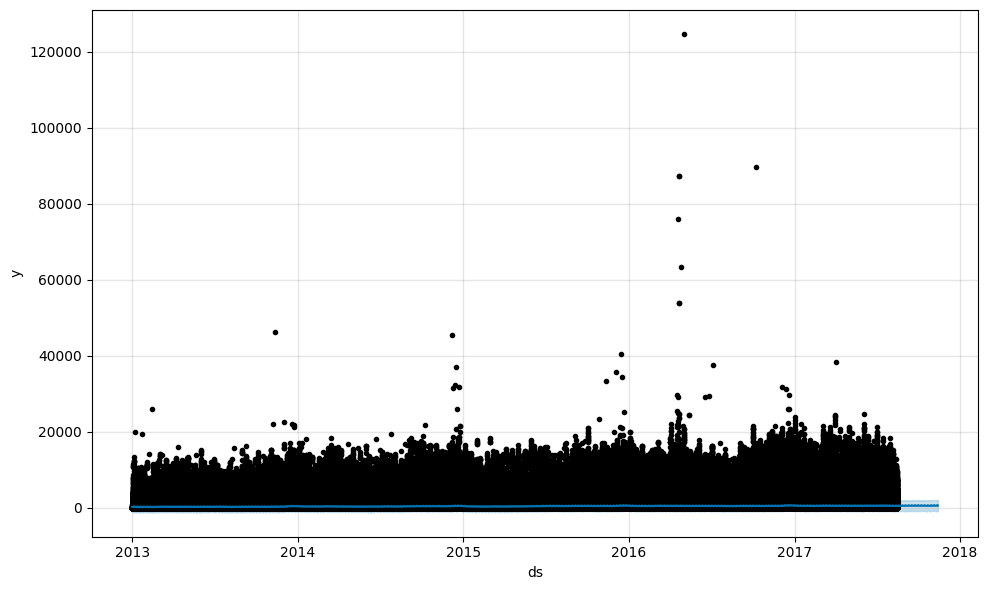

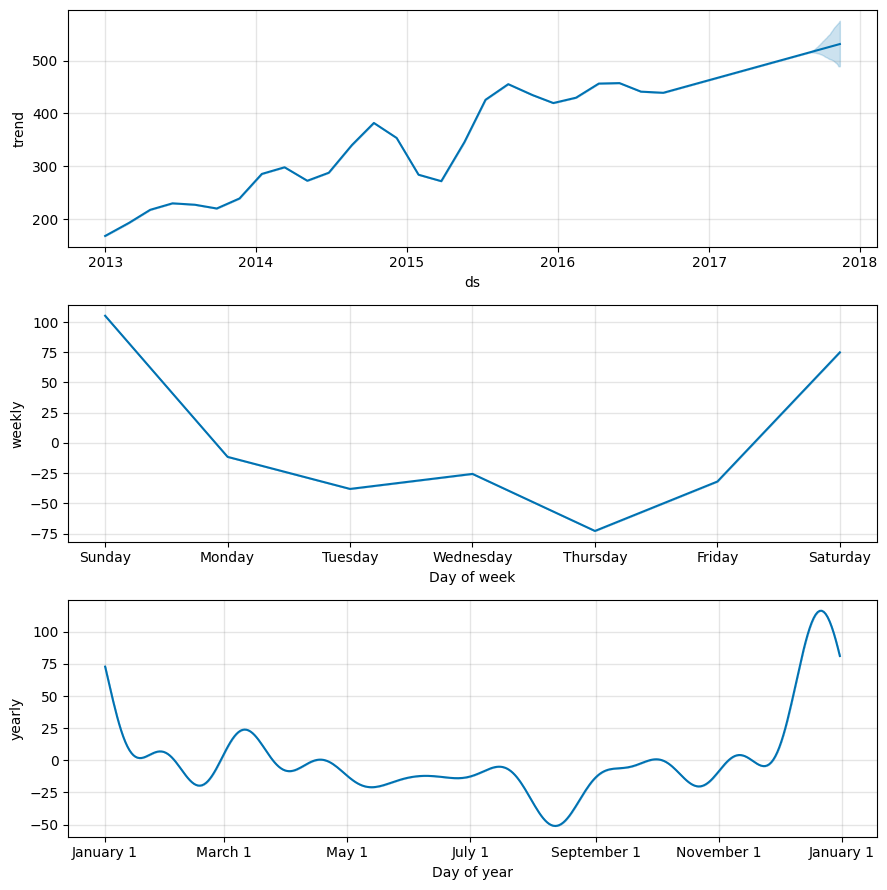

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Load the data
data_oil = pd.read_csv('oil.csv')
data_holidays = pd.read_csv('holidays_events.csv')
data_stores = pd.read_csv('stores.csv')
data_train = pd.read_csv('train.csv')
data_transactions = pd.read_csv('transactions.csv')
data_test = pd.read_csv('test.csv')

# Convert date columns to datetime format and create additional time-related columns
for data in [data_oil, data_holidays, data_stores, data_train, data_transactions, data_test]:
    if 'date' in data.columns:
        data['date'] = pd.to_datetime(data['date'])
        data['year'] = data['date'].dt.year
        data['month'] = data['date'].dt.month
        data['day'] = data['date'].dt.day
        data['day_of_week'] = data['date'].dt.dayofweek
        data['day_name'] = data['date'].dt.strftime('%A')

# Merge datasets to create a comprehensive dataset for training
data_train = data_train.merge(data_oil[['date', 'dcoilwtico']], on='date', how='left')
data_train = data_train.merge(data_holidays.rename(columns={'type': 'holiday_type'}), on=['date', 'day', 'month', 'year', 'day_of_week', 'day_name'], how='left')
data_train = data_train.merge(data_stores.rename(columns={'type': 'store_type'}), on='store_nbr', how='left')
data_train = data_train.merge(data_transactions, on=['date', 'store_nbr', 'day', 'month', 'year', 'day_of_week', 'day_name'], how='left')

# Prepare the data for Prophet
# Assume 'sales' is the target column in 'data_train'
data_prophet = data_train[['date', 'sales']].rename(columns={'date': 'ds', 'sales': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(data_prophet)

# Define the forecast horizon (e.g., next 90 days)
future = model.make_future_dataframe(periods=90)

# Predict future sales
forecast = model.predict(future)

# Plot forecast results
model.plot(forecast)
plt.show()

# Optional: Plot forecast components to understand trend, weekly, and yearly seasonality
model.plot_components(forecast)
plt.show()

# Optional: Evaluate the forecast performance if you have test data


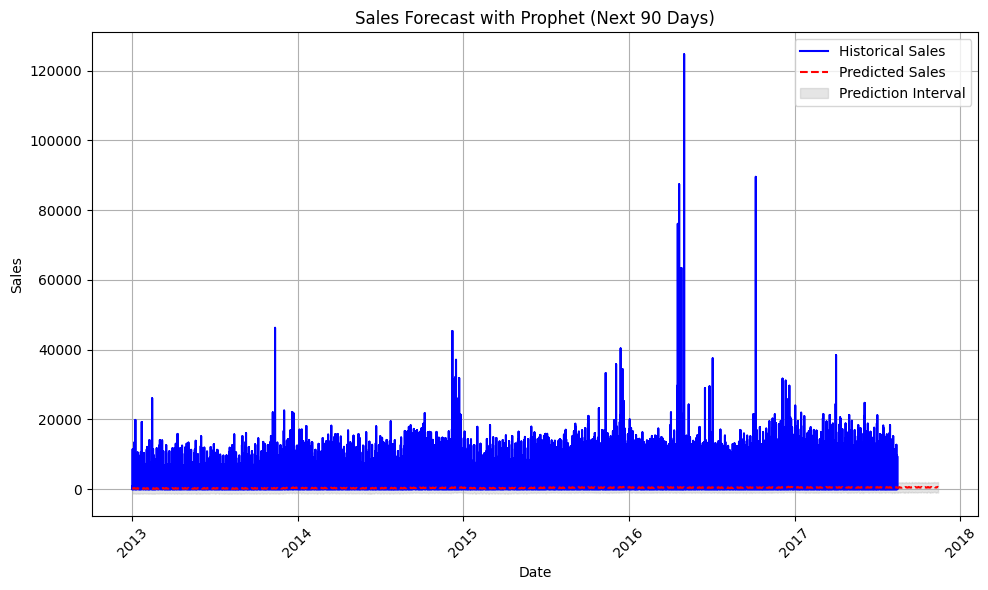

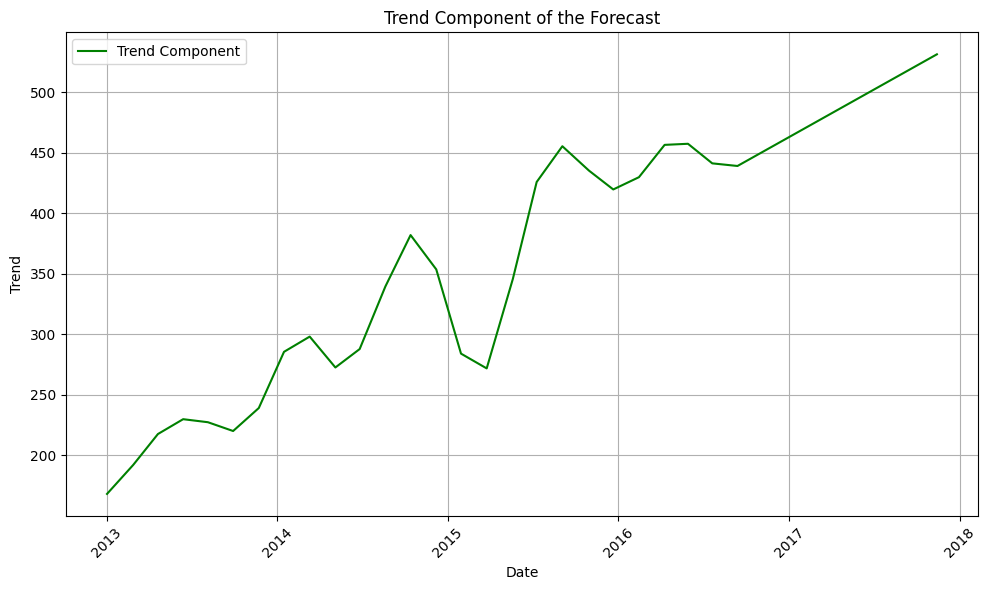

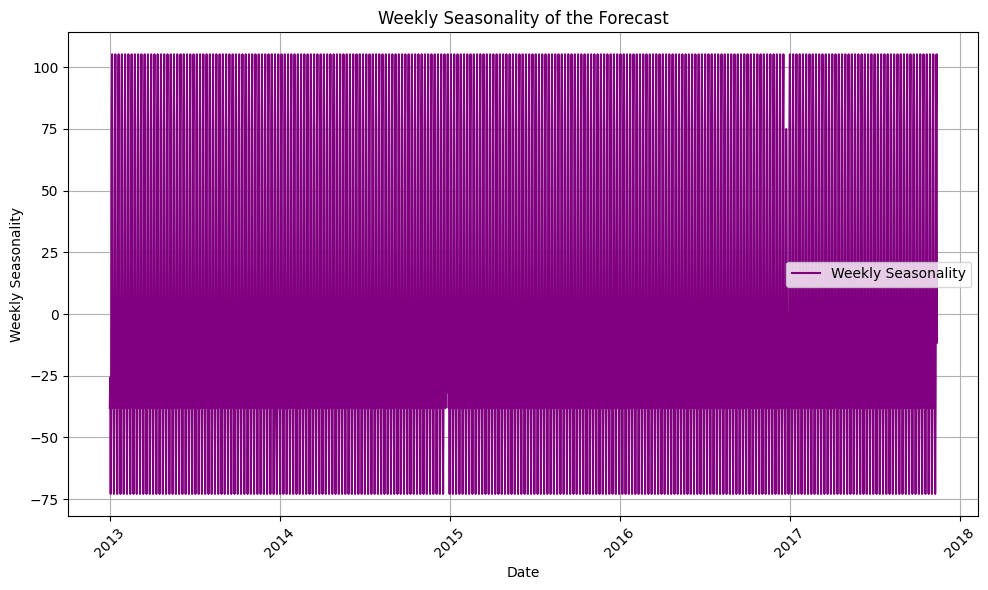

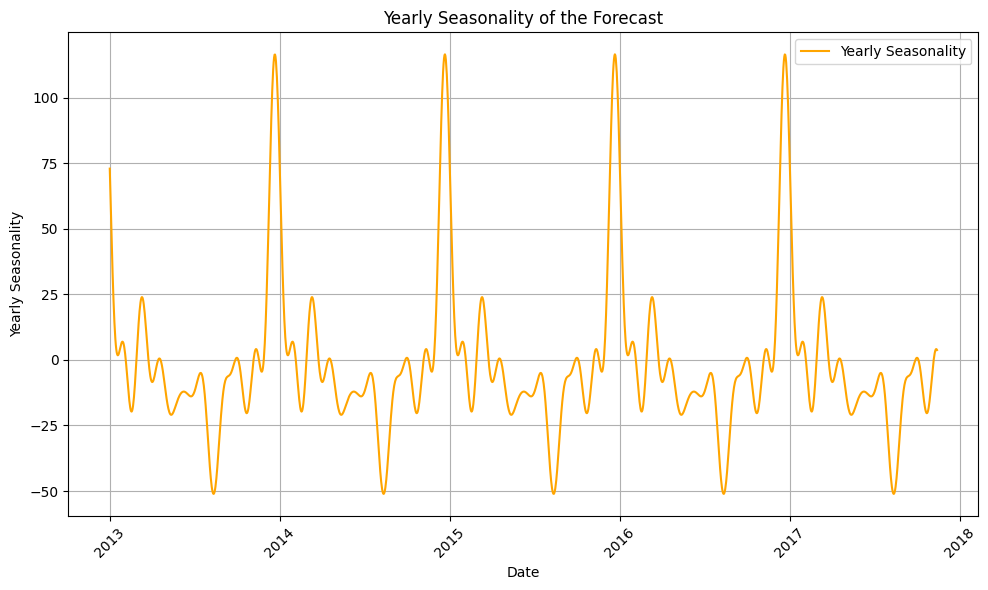

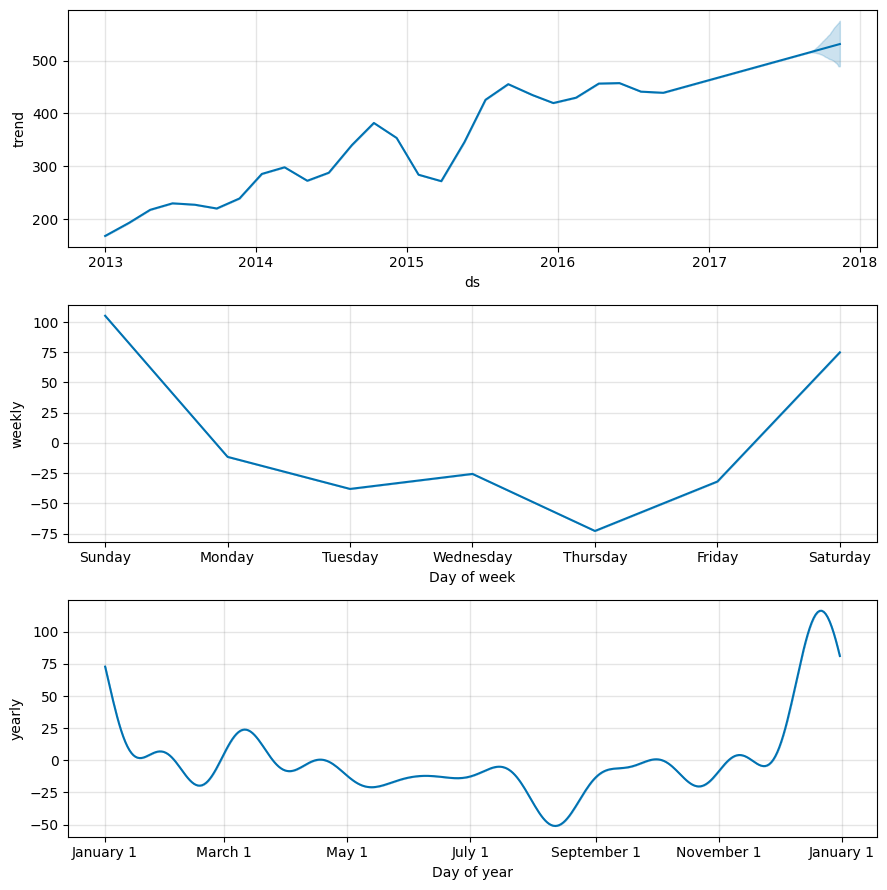

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(data_prophet['ds'], data_prophet['y'], label='Historical Sales', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Sales', color='red', linestyle='--')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Prediction Interval')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast with Prophet (Next 90 Days)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Plot the Seasonal Components**: Trend, Weekly, and Yearly
# Trend Component
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['trend'], label='Trend Component', color='green')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend Component of the Forecast')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Weekly Seasonality
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['weekly'], label='Weekly Seasonality', color='purple')
plt.xlabel('Date')
plt.ylabel('Weekly Seasonality')
plt.title('Weekly Seasonality of the Forecast')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Yearly Seasonality
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yearly'], label='Yearly Seasonality', color='orange')
plt.xlabel('Date')
plt.ylabel('Yearly Seasonality')
plt.title('Yearly Seasonality of the Forecast')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Plot the forecast components in a single graph
model.plot_components(forecast)
plt.show()

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.holidays['ds'] = pd.to_datetime(self.holidays['ds'])
12:40:08 - cmdstanpy - INFO - Chain [1] start processing
12:40:08 - cmdstanpy - INFO - Chain [1] done processing


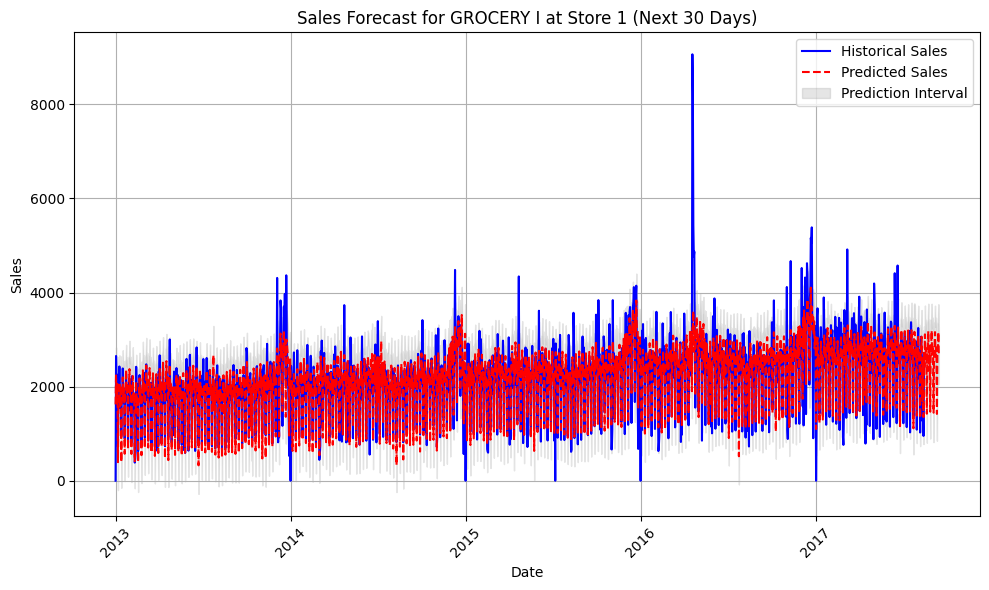

Forecast for GROCERY I at Store 1:

             ds         yhat   yhat_lower   yhat_upper
1684 2017-08-16  3111.532242  2557.962075  3725.307642
1685 2017-08-17  2609.538540  2007.461550  3198.259667
1686 2017-08-18  2815.785157  2173.136885  3421.577789
1687 2017-08-19  2675.578932  2118.473946  3321.856049
1688 2017-08-20  1424.627782   807.803205  2043.490143
1689 2017-08-21  2788.917504  2152.075120  3351.335488
1690 2017-08-22  2825.749643  2190.533893  3435.213349
1691 2017-08-23  3179.701189  2584.168941  3764.427355
1692 2017-08-24  2337.799272  1751.129713  2895.033090
1693 2017-08-25  2873.770427  2313.609078  3427.579772
1694 2017-08-26  2726.383490  2119.906784  3319.347176
1695 2017-08-27  1467.159172   896.016345  2002.748030
1696 2017-08-28  2822.354135  2210.149907  3421.760879
1697 2017-08-29  2849.568406  2263.078170  3448.422252
1698 2017-08-30  3193.696424  2602.867883  3764.257564
1699 2017-08-31  2677.669639  2103.554190  3236.897683
1700 2017-09-01  2868.809837 

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.holidays['ds'] = pd.to_datetime(self.holidays['ds'])
12:40:09 - cmdstanpy - INFO - Chain [1] start processing
12:40:09 - cmdstanpy - INFO - Chain [1] done processing


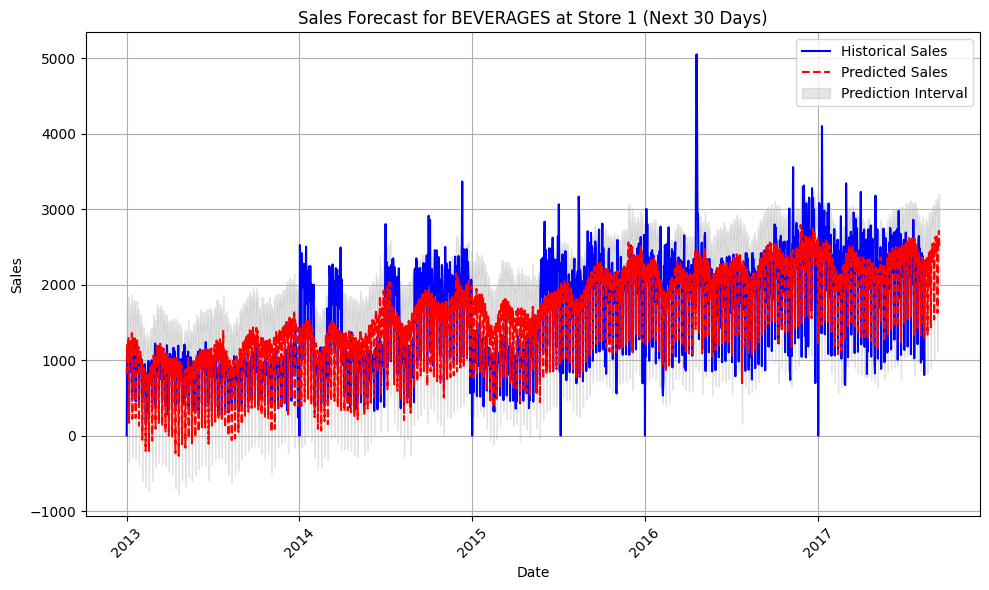

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.holidays['ds'] = pd.to_datetime(self.holidays['ds'])
12:40:10 - cmdstanpy - INFO - Chain [1] start processing


Forecast for BEVERAGES at Store 1:

             ds         yhat   yhat_lower   yhat_upper
1684 2017-08-16  2358.797543  1861.065813  2869.508233
1685 2017-08-17  2119.286867  1618.297002  2606.320410
1686 2017-08-18  2295.686267  1786.216163  2809.243539
1687 2017-08-19  2353.464305  1835.660462  2849.340122
1688 2017-08-20  1339.340905   823.308210  1825.165771
1689 2017-08-21  2273.702883  1756.063171  2765.317318
1690 2017-08-22  2238.080082  1655.021549  2736.295347
1691 2017-08-23  2431.995836  1888.433013  2961.231816
1692 2017-08-24  1984.167520  1468.259028  2470.181048
1693 2017-08-25  2382.670146  1896.813529  2871.467131
1694 2017-08-26  2445.813654  1933.818557  2958.142147
1695 2017-08-27  1436.037032   891.864838  1930.922508
1696 2017-08-28  2373.752158  1847.608159  2890.754867
1697 2017-08-29  2340.532170  1875.782896  2882.990629
1698 2017-08-30  2535.959653  2012.374113  3042.766330
1699 2017-08-31  2304.538632  1800.341659  2796.645739
1700 2017-09-01  2487.284927 

12:40:10 - cmdstanpy - INFO - Chain [1] done processing


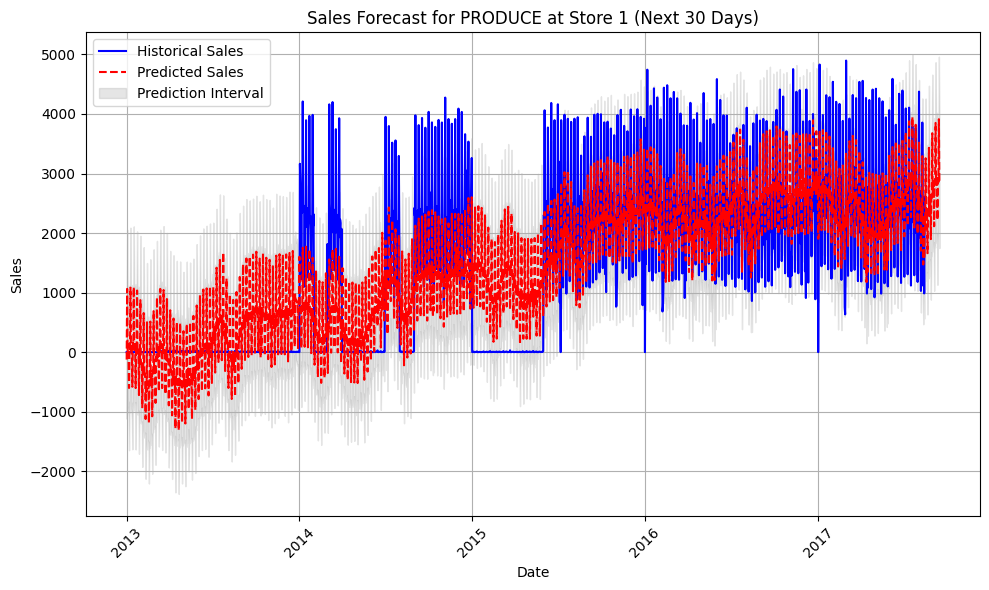

Forecast for PRODUCE at Store 1:

             ds         yhat   yhat_lower   yhat_upper
1684 2017-08-16  3256.657993  2231.418425  4259.412531
1685 2017-08-17  2227.034764  1199.502768  3324.189120
1686 2017-08-18  2332.960868  1323.638467  3363.344739
1687 2017-08-19  2366.578363  1335.306622  3475.969995
1688 2017-08-20  1661.533447   632.200544  2723.391392
1689 2017-08-21  2431.013334  1523.841729  3483.436497
1690 2017-08-22  2345.020526  1241.634843  3371.782332
1691 2017-08-23  3431.270489  2386.784446  4474.582756
1692 2017-08-24  2290.603765  1275.789729  3359.746332
1693 2017-08-25  2545.556806  1558.838863  3572.317533
1694 2017-08-26  2592.994946  1521.156937  3565.842967
1695 2017-08-27  1898.188744   881.509560  2881.881499
1696 2017-08-28  2674.317345  1676.683529  3678.852145
1697 2017-08-29  2591.447525  1613.870867  3598.163887
1698 2017-08-30  3677.427846  2589.963262  4661.526499
1699 2017-08-31  2665.002400  1692.940060  3795.781578
1700 2017-09-01  2781.841942  1

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.holidays['ds'] = pd.to_datetime(self.holidays['ds'])
12:40:11 - cmdstanpy - INFO - Chain [1] start processing
12:40:11 - cmdstanpy - INFO - Chain [1] done processing


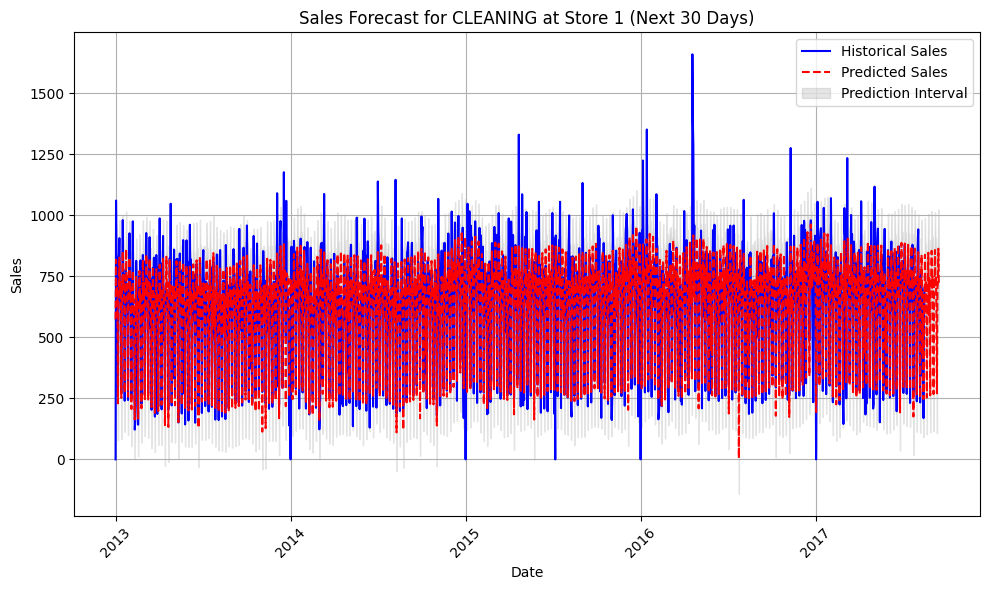

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.holidays['ds'] = pd.to_datetime(self.holidays['ds'])
12:40:11 - cmdstanpy - INFO - Chain [1] start processing


Forecast for CLEANING at Store 1:

             ds        yhat  yhat_lower   yhat_upper
1684 2017-08-16  837.600637  684.511731   988.931882
1685 2017-08-17  685.817123  532.415250   833.039708
1686 2017-08-18  734.164458  571.497168   882.730432
1687 2017-08-19  599.679915  431.911484   742.767619
1688 2017-08-20  253.030133  102.685012   402.227357
1689 2017-08-21  688.631645  534.866485   827.475045
1690 2017-08-22  703.043034  534.163136   860.600445
1691 2017-08-23  846.236420  691.740311  1005.393197
1692 2017-08-24  591.233125  435.395525   749.659727
1693 2017-08-25  743.585972  597.588044   899.714720
1694 2017-08-26  609.168143  452.858956   767.276063
1695 2017-08-27  262.382394  109.749843   433.505477
1696 2017-08-28  697.664525  544.399487   850.954332
1697 2017-08-29  711.598270  558.241140   865.262252
1698 2017-08-30  854.185984  697.417179  1017.310680
1699 2017-08-31  702.206666  551.907454   867.260573
1700 2017-09-01  750.080445  596.885925   912.106616
1701 2017-0

12:40:11 - cmdstanpy - INFO - Chain [1] done processing


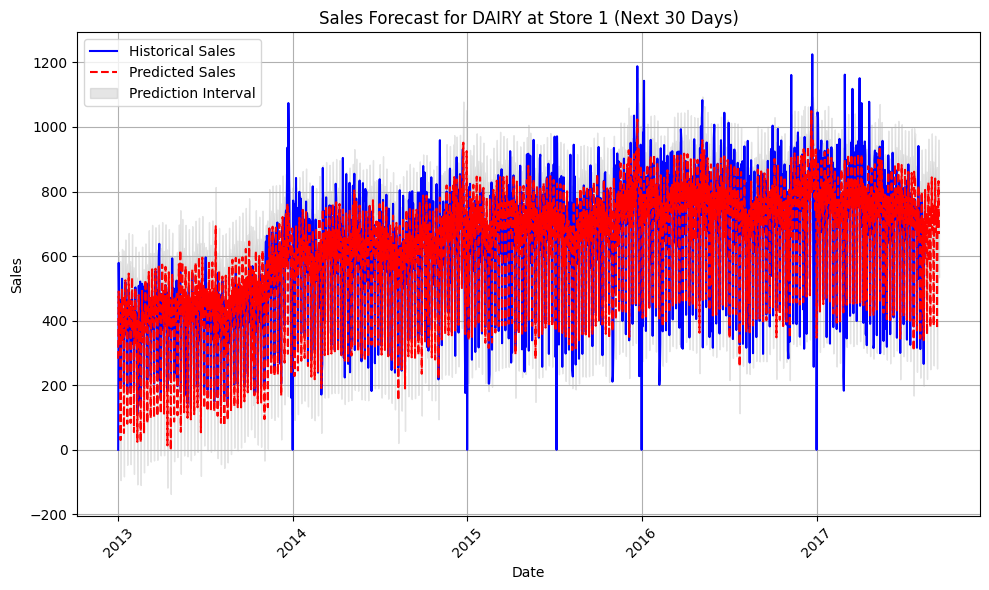

Forecast for DAIRY at Store 1:

             ds        yhat  yhat_lower  yhat_upper
1684 2017-08-16  804.890911  676.223414  931.984015
1685 2017-08-17  643.900793  500.642655  765.032073
1686 2017-08-18  714.438220  585.918773  840.341479
1687 2017-08-19  733.494384  602.806094  861.576947
1688 2017-08-20  357.940334  219.346691  480.391912
1689 2017-08-21  715.818897  587.399606  837.784125
1690 2017-08-22  698.677630  578.535955  835.481738
1691 2017-08-23  828.021528  701.455217  963.586330
1692 2017-08-24  583.440684  459.710749  714.660447
1693 2017-08-25  738.002155  610.666117  864.769835
1694 2017-08-26  756.446575  620.232038  893.865785
1695 2017-08-27  379.761048  249.447737  498.967933
1696 2017-08-28  736.031326  600.753748  862.173543
1697 2017-08-29  716.861379  581.605275  845.880519
1698 2017-08-30  843.824505  703.450651  980.038652
1699 2017-08-31  680.676844  555.082143  815.125785
1700 2017-09-01  748.307994  618.643427  877.954099
1701 2017-09-02  763.813107  624

In [3]:
# Filter the data for one store and top 5 families (for example, Store 1)
store_number = 1  # Change to any store you want to analyze
top_5_families = data_train.groupby('family')['sales'].sum().nlargest(5).index
data_filtered = data_train[(data_train['store_nbr'] == store_number) & (data_train['family'].isin(top_5_families))]

# Rename columns in data_holidays to match Prophet's expected format
data_holidays = data_holidays.rename(columns={'date': 'ds', 'type': 'holiday'})

# Prepare Prophet data for each family (filtering by product family)
for family in top_5_families:
    data_family = data_filtered[data_filtered['family'] == family]
    data_prophet = data_family[['date', 'sales']].rename(columns={'date': 'ds', 'sales': 'y'})

    # Initialize and fit the Prophet model
    model = Prophet(holidays=data_holidays[['ds', 'holiday']], yearly_seasonality=True, weekly_seasonality=True)
    model.fit(data_prophet)

    # Define the forecast horizon (e.g., next 30 days)
    future = model.make_future_dataframe(periods=30)

    # Predict future sales
    forecast = model.predict(future)

    # Plot the sales forecast including historical sales and prediction interval
    plt.figure(figsize=(10, 6))
    plt.plot(data_prophet['ds'], data_prophet['y'], label='Historical Sales', color='blue')
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Sales', color='red', linestyle='--')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Prediction Interval')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title(f'Sales Forecast for {family} at Store {store_number} (Next 30 Days)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Print the forecast for the next 30 days
    print(f"Forecast for {family} at Store {store_number}:\n")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))


In [4]:
print(data_holidays.columns)


Index(['ds', 'holiday', 'locale', 'locale_name', 'description', 'transferred',
       'year', 'month', 'day', 'day_of_week', 'day_name'],
      dtype='object')


13:09:43 - cmdstanpy - INFO - Chain [1] start processing
13:09:58 - cmdstanpy - INFO - Chain [1] done processing
13:10:03 - cmdstanpy - INFO - Chain [1] start processing
13:10:35 - cmdstanpy - INFO - Chain [1] done processing
13:10:41 - cmdstanpy - INFO - Chain [1] start processing
13:11:14 - cmdstanpy - INFO - Chain [1] done processing
13:11:19 - cmdstanpy - INFO - Chain [1] start processing
13:11:27 - cmdstanpy - INFO - Chain [1] done processing
13:11:33 - cmdstanpy - INFO - Chain [1] start processing
13:11:43 - cmdstanpy - INFO - Chain [1] done processing
13:11:48 - cmdstanpy - INFO - Chain [1] start processing
13:12:07 - cmdstanpy - INFO - Chain [1] done processing
13:12:12 - cmdstanpy - INFO - Chain [1] start processing
13:12:23 - cmdstanpy - INFO - Chain [1] done processing
13:12:28 - cmdstanpy - INFO - Chain [1] start processing
13:12:34 - cmdstanpy - INFO - Chain [1] done processing
13:12:39 - cmdstanpy - INFO - Chain [1] start processing
13:12:51 - cmdstanpy - INFO - Chain [1]

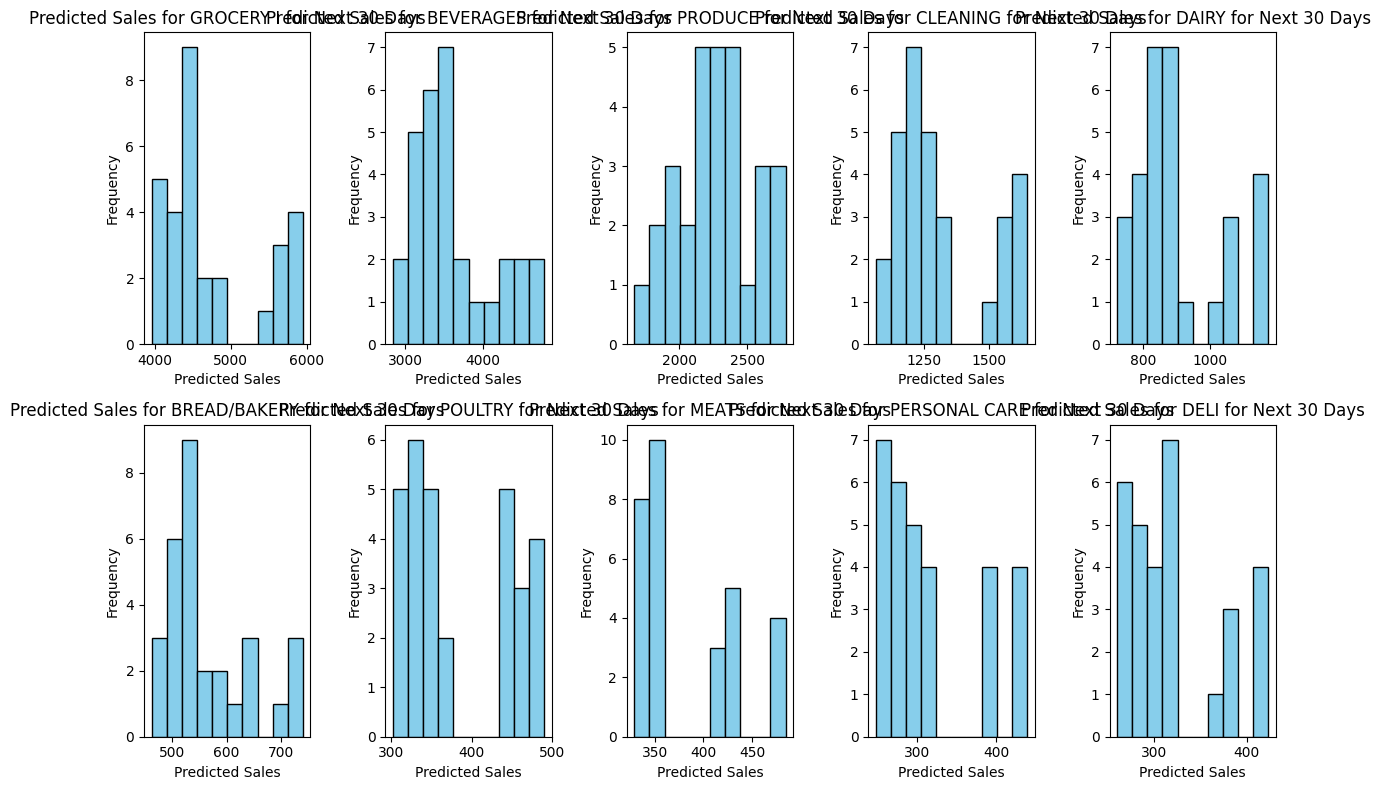

13:13:22 - cmdstanpy - INFO - Chain [1] start processing
13:13:37 - cmdstanpy - INFO - Chain [1] done processing


Predicted sales for GROCERY I for the next 30 days:
Day 1: 4276.64 units
Day 2: 3955.45 units
Day 3: 4237.72 units
Day 4: 5494.59 units
Day 5: 5861.58 units
Day 6: 4706.84 units
Day 7: 4387.03 units
Day 8: 4391.37 units
Day 9: 4066.25 units
Day 10: 4342.55 units
Day 11: 5591.56 units
Day 12: 5949.01 units
Day 13: 4783.32 units
Day 14: 4451.43 units
Day 15: 4442.92 units
Day 16: 4104.56 units
Day 17: 4367.58 units
Day 18: 5603.67 units
Day 19: 5948.95 units
Day 20: 4772.18 units
Day 21: 4430.66 units
Day 22: 4414.27 units
Day 23: 4070.01 units
Day 24: 4329.32 units
Day 25: 5564.01 units
Day 26: 5910.29 units
Day 27: 4736.90 units
Day 28: 4401.08 units
Day 29: 4392.54 units
Day 30: 4058.09 units


13:13:42 - cmdstanpy - INFO - Chain [1] start processing
13:14:21 - cmdstanpy - INFO - Chain [1] done processing


Predicted sales for BEVERAGES for the next 30 days:
Day 1: 3042.36 units
Day 2: 2838.57 units
Day 3: 3143.41 units
Day 4: 4010.21 units
Day 5: 4330.26 units
Day 6: 3343.66 units
Day 7: 3138.93 units
Day 8: 3163.76 units
Day 9: 2973.22 units
Day 10: 3289.89 units
Day 11: 4166.97 units
Day 12: 4495.66 units
Day 13: 3515.98 units
Day 14: 3316.42 units
Day 15: 3344.64 units
Day 16: 3155.73 units
Day 17: 3472.29 units
Day 18: 4347.59 units
Day 19: 4672.91 units
Day 20: 3688.36 units
Day 21: 3482.56 units
Day 22: 3503.32 units
Day 23: 3305.85 units
Day 24: 3612.93 units
Day 25: 4477.99 units
Day 26: 4792.47 units
Day 27: 3796.68 units
Day 28: 3579.38 units
Day 29: 3588.55 units
Day 30: 3379.55 units


13:14:28 - cmdstanpy - INFO - Chain [1] start processing


KeyboardInterrupt: 

In [6]:
# Identify the top 10 products based on total sales
top_10_families = data_train.groupby('family')['sales'].sum().nlargest(10).index

# Prepare a figure for plotting
plt.figure(figsize=(12, 8))

# Loop through the top 10 families and forecast sales
for i, family in enumerate(top_10_families):
    # Filter the data for the current product family
    data_family = data_train[data_train['family'] == family]

    # Prepare the data for Prophet
    data_prophet = data_family[['date', 'sales']].rename(columns={'date': 'ds', 'sales': 'y'})
    
    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(data_prophet)

    # Define the forecast horizon (e.g., next 30 days)
    future = model.make_future_dataframe(periods=30)

    # Predict future sales
    forecast = model.predict(future)

    # Plotting the histogram of predicted sales for the next 30 days
    plt.subplot(2, 5, i+1)  # 2 rows and 5 columns for the 10 products
    plt.hist(forecast['yhat'][-30:], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Predicted Sales for {family} for Next 30 Days')
    plt.xlabel('Predicted Sales')
    plt.ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Optional: Print the predicted sales for the next 30 days for each family
for family in top_10_families:
    data_family = data_train[data_train['family'] == family]
    data_prophet = data_family[['date', 'sales']].rename(columns={'date': 'ds', 'sales': 'y'})
    
    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(data_prophet)

    # Define the forecast horizon (e.g., next 30 days)
    future = model.make_future_dataframe(periods=30)

    # Predict future sales
    forecast = model.predict(future)

    # Print the predicted sales for the next 30 days
    print(f"Predicted sales for {family} for the next 30 days:")
    for day, sales in zip(range(1, 31), forecast['yhat'][-30:]):
        print(f"Day {day}: {sales:.2f} units")


13:15:06 - cmdstanpy - INFO - Chain [1] start processing
13:15:21 - cmdstanpy - INFO - Chain [1] done processing
13:15:27 - cmdstanpy - INFO - Chain [1] start processing
13:15:58 - cmdstanpy - INFO - Chain [1] done processing
13:16:04 - cmdstanpy - INFO - Chain [1] start processing
13:16:35 - cmdstanpy - INFO - Chain [1] done processing
13:16:41 - cmdstanpy - INFO - Chain [1] start processing
13:16:50 - cmdstanpy - INFO - Chain [1] done processing
13:16:55 - cmdstanpy - INFO - Chain [1] start processing
13:17:05 - cmdstanpy - INFO - Chain [1] done processing
13:17:10 - cmdstanpy - INFO - Chain [1] start processing
13:17:29 - cmdstanpy - INFO - Chain [1] done processing
13:17:34 - cmdstanpy - INFO - Chain [1] start processing
13:17:45 - cmdstanpy - INFO - Chain [1] done processing
13:17:50 - cmdstanpy - INFO - Chain [1] start processing
13:17:56 - cmdstanpy - INFO - Chain [1] done processing
13:18:02 - cmdstanpy - INFO - Chain [1] start processing
13:18:13 - cmdstanpy - INFO - Chain [1]

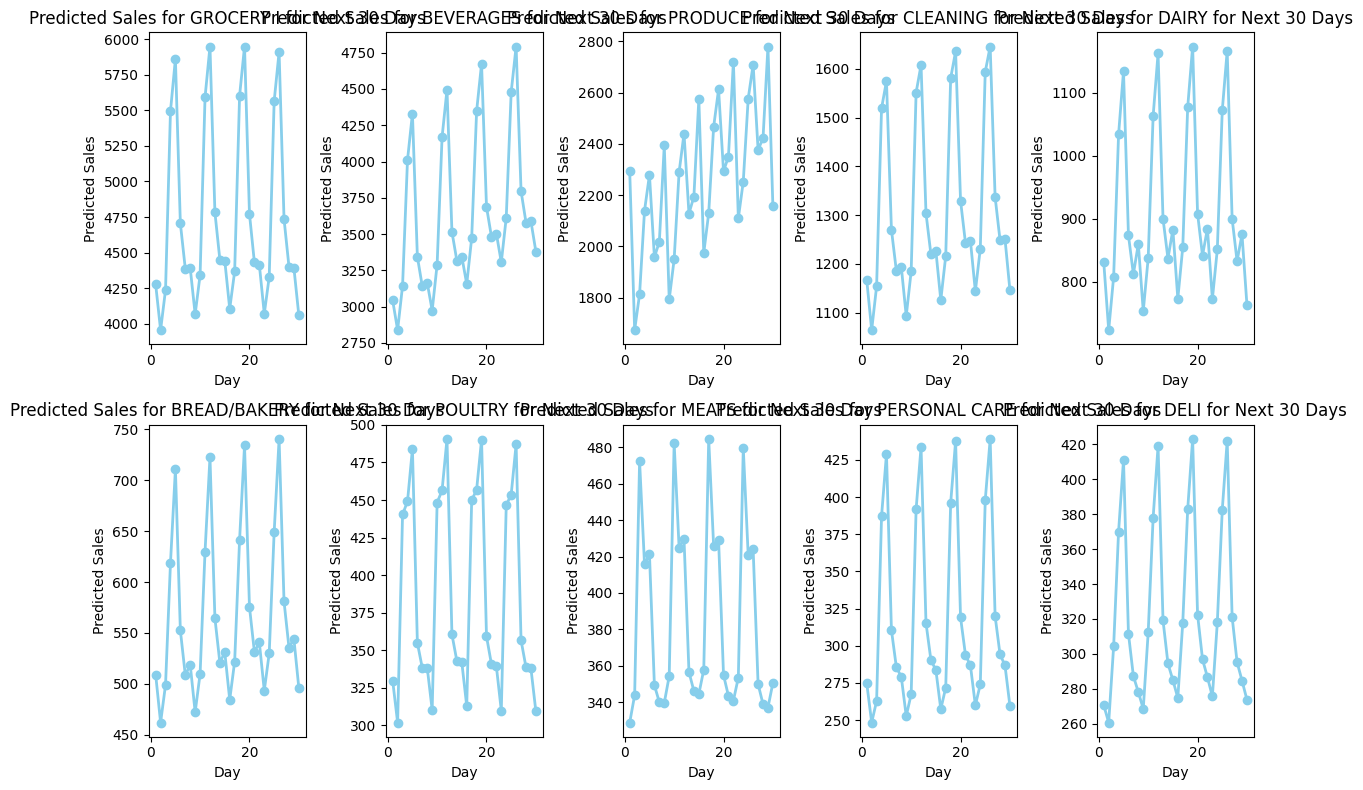

13:18:42 - cmdstanpy - INFO - Chain [1] start processing
13:18:58 - cmdstanpy - INFO - Chain [1] done processing


Predicted sales for GROCERY I for the next 30 days:
Day 1: 4276.64 units
Day 2: 3955.45 units
Day 3: 4237.72 units
Day 4: 5494.59 units
Day 5: 5861.58 units
Day 6: 4706.84 units
Day 7: 4387.03 units
Day 8: 4391.37 units
Day 9: 4066.25 units
Day 10: 4342.55 units
Day 11: 5591.56 units
Day 12: 5949.01 units
Day 13: 4783.32 units
Day 14: 4451.43 units
Day 15: 4442.92 units
Day 16: 4104.56 units
Day 17: 4367.58 units
Day 18: 5603.67 units
Day 19: 5948.95 units
Day 20: 4772.18 units
Day 21: 4430.66 units
Day 22: 4414.27 units
Day 23: 4070.01 units
Day 24: 4329.32 units
Day 25: 5564.01 units
Day 26: 5910.29 units
Day 27: 4736.90 units
Day 28: 4401.08 units
Day 29: 4392.54 units
Day 30: 4058.09 units


13:19:03 - cmdstanpy - INFO - Chain [1] start processing
13:19:36 - cmdstanpy - INFO - Chain [1] done processing


Predicted sales for BEVERAGES for the next 30 days:
Day 1: 3042.36 units
Day 2: 2838.57 units
Day 3: 3143.41 units
Day 4: 4010.21 units
Day 5: 4330.26 units
Day 6: 3343.66 units
Day 7: 3138.93 units
Day 8: 3163.76 units
Day 9: 2973.22 units
Day 10: 3289.89 units
Day 11: 4166.97 units
Day 12: 4495.66 units
Day 13: 3515.98 units
Day 14: 3316.42 units
Day 15: 3344.64 units
Day 16: 3155.73 units
Day 17: 3472.29 units
Day 18: 4347.59 units
Day 19: 4672.91 units
Day 20: 3688.36 units
Day 21: 3482.56 units
Day 22: 3503.32 units
Day 23: 3305.85 units
Day 24: 3612.93 units
Day 25: 4477.99 units
Day 26: 4792.47 units
Day 27: 3796.68 units
Day 28: 3579.38 units
Day 29: 3588.55 units
Day 30: 3379.55 units


13:19:41 - cmdstanpy - INFO - Chain [1] start processing
13:20:14 - cmdstanpy - INFO - Chain [1] done processing


Predicted sales for PRODUCE for the next 30 days:
Day 1: 2294.09 units
Day 2: 1672.98 units
Day 3: 1813.28 units
Day 4: 2139.27 units
Day 5: 2279.04 units
Day 6: 1957.36 units
Day 7: 2017.33 units
Day 8: 2394.81 units
Day 9: 1792.29 units
Day 10: 1948.99 units
Day 11: 2289.04 units
Day 12: 2440.38 units
Day 13: 2127.71 units
Day 14: 2194.11 units
Day 15: 2575.46 units
Day 16: 1974.31 units
Day 17: 2130.00 units
Day 18: 2466.79 units
Day 19: 2612.81 units
Day 20: 2292.97 units
Day 21: 2350.57 units
Day 22: 2721.76 units
Day 23: 2109.34 units
Day 24: 2252.91 units
Day 25: 2577.01 units
Day 26: 2710.01 units
Day 27: 2377.09 units
Day 28: 2421.76 units
Day 29: 2780.39 units
Day 30: 2155.95 units


13:20:20 - cmdstanpy - INFO - Chain [1] start processing
13:20:28 - cmdstanpy - INFO - Chain [1] done processing


Predicted sales for CLEANING for the next 30 days:
Day 1: 1166.78 units
Day 2: 1064.08 units
Day 3: 1153.80 units
Day 4: 1519.23 units
Day 5: 1574.75 units
Day 6: 1270.26 units
Day 7: 1185.66 units
Day 8: 1193.54 units
Day 9: 1093.03 units
Day 10: 1184.58 units
Day 11: 1551.41 units
Day 12: 1607.91 units
Day 13: 1303.93 units
Day 14: 1219.39 units
Day 15: 1226.87 units
Day 16: 1125.54 units
Day 17: 1215.85 units
Day 18: 1581.08 units
Day 19: 1635.64 units
Day 20: 1329.46 units
Day 21: 1242.51 units
Day 22: 1247.44 units
Day 23: 1143.47 units
Day 24: 1231.13 units
Day 25: 1593.77 units
Day 26: 1645.86 units
Day 27: 1337.37 units
Day 28: 1248.34 units
Day 29: 1251.46 units
Day 30: 1145.97 units


13:20:34 - cmdstanpy - INFO - Chain [1] start processing
13:20:43 - cmdstanpy - INFO - Chain [1] done processing


Predicted sales for DAIRY for the next 30 days:
Day 1: 830.58 units
Day 2: 723.37 units
Day 3: 807.60 units
Day 4: 1033.53 units
Day 5: 1133.97 units
Day 6: 873.55 units
Day 7: 812.09 units
Day 8: 860.11 units
Day 9: 753.35 units
Day 10: 837.51 units
Day 11: 1062.85 units
Day 12: 1162.21 units
Day 13: 900.26 units
Day 14: 836.84 units
Day 15: 882.53 units
Day 16: 773.15 units
Day 17: 854.45 units
Day 18: 1076.78 units
Day 19: 1173.04 units
Day 20: 907.99 units
Day 21: 841.54 units
Day 22: 884.37 units
Day 23: 772.34 units
Day 24: 851.28 units
Day 25: 1071.58 units
Day 26: 1166.20 units
Day 27: 899.92 units
Day 28: 832.69 units
Day 29: 875.16 units
Day 30: 763.22 units


13:20:49 - cmdstanpy - INFO - Chain [1] start processing
13:21:11 - cmdstanpy - INFO - Chain [1] done processing


Predicted sales for BREAD/BAKERY for the next 30 days:
Day 1: 509.17 units
Day 2: 462.01 units
Day 3: 499.04 units
Day 4: 618.75 units
Day 5: 711.16 units
Day 6: 552.67 units
Day 7: 508.76 units
Day 8: 518.73 units
Day 9: 472.21 units
Day 10: 509.83 units
Day 11: 630.03 units
Day 12: 722.84 units
Day 13: 564.66 units
Day 14: 520.93 units
Day 15: 530.98 units
Day 16: 484.44 units
Day 17: 521.90 units
Day 18: 641.84 units
Day 19: 734.27 units
Day 20: 575.61 units
Day 21: 531.31 units
Day 22: 540.69 units
Day 23: 493.39 units
Day 24: 530.03 units
Day 25: 649.10 units
Day 26: 740.61 units
Day 27: 581.00 units
Day 28: 535.74 units
Day 29: 544.15 units
Day 30: 495.90 units


13:21:17 - cmdstanpy - INFO - Chain [1] start processing
13:21:30 - cmdstanpy - INFO - Chain [1] done processing


Predicted sales for POULTRY for the next 30 days:
Day 1: 329.63 units
Day 2: 301.89 units
Day 3: 440.38 units
Day 4: 449.07 units
Day 5: 484.06 units
Day 6: 354.93 units
Day 7: 338.14 units
Day 8: 338.25 units
Day 9: 310.24 units
Day 10: 448.29 units
Day 11: 456.38 units
Day 12: 490.61 units
Day 13: 360.60 units
Day 14: 342.84 units
Day 15: 341.91 units
Day 16: 312.83 units
Day 17: 449.82 units
Day 18: 456.88 units
Day 19: 490.15 units
Day 20: 359.29 units
Day 21: 340.80 units
Day 22: 339.29 units
Day 23: 309.81 units
Day 24: 446.58 units
Day 25: 453.63 units
Day 26: 487.09 units
Day 27: 356.61 units
Day 28: 338.70 units
Day 29: 337.94 units
Day 30: 309.37 units


13:21:35 - cmdstanpy - INFO - Chain [1] start processing
13:21:42 - cmdstanpy - INFO - Chain [1] done processing


Predicted sales for MEATS for the next 30 days:
Day 1: 328.85 units
Day 2: 343.87 units
Day 3: 472.40 units
Day 4: 415.62 units
Day 5: 421.28 units
Day 6: 349.32 units
Day 7: 340.04 units
Day 8: 339.65 units
Day 9: 354.37 units
Day 10: 482.37 units
Day 11: 424.88 units
Day 12: 429.64 units
Day 13: 356.62 units
Day 14: 346.15 units
Day 15: 344.48 units
Day 16: 357.87 units
Day 17: 484.51 units
Day 18: 425.68 units
Day 19: 429.16 units
Day 20: 354.96 units
Day 21: 343.44 units
Day 22: 340.86 units
Day 23: 353.54 units
Day 24: 479.68 units
Day 25: 420.58 units
Day 26: 424.02 units
Day 27: 350.02 units
Day 28: 338.94 units
Day 29: 337.05 units
Day 30: 350.62 units


13:21:48 - cmdstanpy - INFO - Chain [1] start processing
13:21:59 - cmdstanpy - INFO - Chain [1] done processing


Predicted sales for PERSONAL CARE for the next 30 days:
Day 1: 274.87 units
Day 2: 248.41 units
Day 3: 262.90 units
Day 4: 387.13 units
Day 5: 429.00 units
Day 6: 310.65 units
Day 7: 285.63 units
Day 8: 279.10 units
Day 9: 252.79 units
Day 10: 267.41 units
Day 11: 391.75 units
Day 12: 433.70 units
Day 13: 315.40 units
Day 14: 290.38 units
Day 15: 283.80 units
Day 16: 257.40 units
Day 17: 271.87 units
Day 18: 396.02 units
Day 19: 437.73 units
Day 20: 319.13 units
Day 21: 293.77 units
Day 22: 286.81 units
Day 23: 260.00 units
Day 24: 274.05 units
Day 25: 397.76 units
Day 26: 439.01 units
Day 27: 319.98 units
Day 28: 294.20 units
Day 29: 286.84 units
Day 30: 259.67 units


13:22:05 - cmdstanpy - INFO - Chain [1] start processing
13:22:23 - cmdstanpy - INFO - Chain [1] done processing


Predicted sales for DELI for the next 30 days:
Day 1: 270.56 units
Day 2: 260.69 units
Day 3: 304.29 units
Day 4: 370.02 units
Day 5: 411.11 units
Day 6: 311.65 units
Day 7: 287.24 units
Day 8: 278.16 units
Day 9: 268.55 units
Day 10: 312.30 units
Day 11: 378.03 units
Day 12: 419.00 units
Day 13: 319.30 units
Day 14: 294.52 units
Day 15: 284.96 units
Day 16: 274.77 units
Day 17: 317.85 units
Day 18: 382.85 units
Day 19: 423.05 units
Day 20: 322.54 units
Day 21: 296.96 units
Day 22: 286.61 units
Day 23: 275.67 units
Day 24: 318.05 units
Day 25: 382.44 units
Day 26: 422.10 units
Day 27: 321.17 units
Day 28: 295.28 units
Day 29: 284.74 units
Day 30: 273.74 units


In [7]:
# Identify the top 10 products based on total sales
top_10_families = data_train.groupby('family')['sales'].sum().nlargest(10).index

# Prepare a figure for plotting
plt.figure(figsize=(12, 8))

# Loop through the top 10 families and forecast sales
for i, family in enumerate(top_10_families):
    # Filter the data for the current product family
    data_family = data_train[data_train['family'] == family]

    # Prepare the data for Prophet
    data_prophet = data_family[['date', 'sales']].rename(columns={'date': 'ds', 'sales': 'y'})
    
    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(data_prophet)

    # Define the forecast horizon (e.g., next 30 days)
    future = model.make_future_dataframe(periods=30)

    # Predict future sales
    forecast = model.predict(future)

    # Plotting the predicted sales for the next 30 days (using days on the x-axis)
    plt.subplot(2, 5, i+1)  # 2 rows and 5 columns for the 10 products
    days = np.arange(1, 31)  # Days from 1 to 30
    plt.plot(days, forecast['yhat'][-30:], color='skyblue', marker='o', linestyle='-', linewidth=2)
    plt.title(f'Predicted Sales for {family} for Next 30 Days')
    plt.xlabel('Day')
    plt.ylabel('Predicted Sales')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Optional: Print the predicted sales for the next 30 days for each family
for family in top_10_families:
    data_family = data_train[data_train['family'] == family]
    data_prophet = data_family[['date', 'sales']].rename(columns={'date': 'ds', 'sales': 'y'})
    
    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(data_prophet)

    # Define the forecast horizon (e.g., next 30 days)
    future = model.make_future_dataframe(periods=30)

    # Predict future sales
    forecast = model.predict(future)

    # Print the predicted sales for the next 30 days
    print(f"Predicted sales for {family} for the next 30 days:")
    for day, sales in zip(range(1, 31), forecast['yhat'][-30:]):
        print(f"Day {day}: {sales:.2f} units")


In [5]:
print(data_holidays.columns)


Index(['ds', 'holiday', 'locale', 'locale_name', 'description', 'transferred',
       'year', 'month', 'day', 'day_of_week', 'day_name'],
      dtype='object')
